In [1464]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def step(x, w, ρ, m):
    x1, x2 = x
    w1, w2 = w
    ρ1, ρ2 = ρ
    m1, m2 = m
    
    xx1 = x1 * w1 / (x1 * w1 + 1 - x1)
    xx2 = x2 * w2 / (x2 * w2 + 1 - x2)
    
    xxx1 = ρ1 * xx1 + (1 - ρ1) * x1
    xxx2 = ρ2 * xx2 + (1 - ρ2) * x2
    
    xxxx1 = (1 - m1) * xxx1 + m2 * xxx2
    xxxx2 = (1 - m2) * xxx2 + m1 * xxx1
    
    return xxxx1, xxxx2

In [1274]:
x = [0.5, 0.5]
w = [2., 0.5]
ρ = [0.1, 0.2]
m = [.1] * 2

In [1410]:
x = step(x, w, ρ, m)
x

(0.8216990566023848, 0.17830094339761537)

In [1561]:
def equil(x, w, ρ, m, err=1e-4):
    x_ = (-1, -1)
    while abs(x[0]/x_[0]-1) + abs(x[1]/x_[1]-1) > err:
        x_ = x
        x = step(x, w, ρ, m)
    return x

def mf(x, w):
    x1, x2 = x
    w1, w2 = w
    return (1-x1+x1*w1)/np.maximum(w1, 1), (1-x2+x2*w2)/np.maximum(w2, 1)

In [1463]:
x = [0.5, 0.5]
w = [2., 0.5]
ρ = [0.9, 0.8]
m = [0.1] * 2
x = equil(x, w, ρ, m)
mf(x, w)
# x

(0.9070268439073018, 0.8933866189557248)

In [1589]:
x = [0.5, 0.5]
w = [2., 0.5]
ρ = [0.9, 0.5]
m = [0.1] * 2

ms = np.logspace(-4, -0.3, 200)
xstar = np.array([
    equil(x, w, ρ, (m, m))
    for m in ms
])

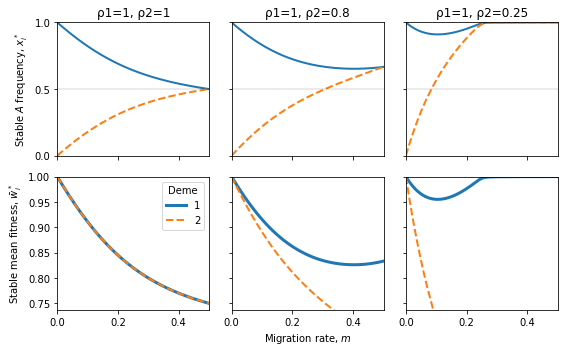

In [1633]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5), sharex=True, sharey='row')

for j, ρ in enumerate([(1,1), (1, 0.8), (1, 0.25)]):
    xstar = np.array([
        equil(x, w, ρ, (m, m))
        for m in ms
    ])

    ax = axes[0,j]
    lines = ax.plot(ms, xstar, lw=2)
    lines[1].set_linestyle('--')
    if j == 0:
        ax.set(        
            ylabel=('Stable $A$ frequency, $x_i^*$'),
            ylim=(0, 1),
            yticks=[0, 0.5, 1],
            xlim=(ms.min(), ms.max()),
        )
    ax.set_title('ρ1={}, ρ2={}'.format(*ρ))
    ax.axhline(0.5, ls='-', color='k', alpha=0.1)

    ax = axes[1,j]
    mf1, mf2 = mf(xstar.T, w)
    ax.plot(ms, mf1, lw=3)
    ax.plot(ms, mf2, ls='--', lw=2)    
    if j == 0:
        ax.set(        
            ylabel=(r'Stable mean fitness, $\bar{w}^*_i$'),
            ylim=(None, 1),
            xlim=(ms.min(), ms.max())
        )
        ax.legend([r'1', r'2'], title='Deme', loc='upper right')
    if j == 1: ax.set_xlabel('Migration rate, $m$')
fig.tight_layout()
fig.savefig('../figures/migration.pdf', dpi=300)

In [1628]:
!open ../figures/migration.pdf